In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting Pandas Display Options
pd.set_option('display.max_rows', 200) 
pd.set_option('display.max_columns', 100) 

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')

## Sorting by ID and time
---

In [4]:
df = df.sort_values(by=["id","time"],ascending=[True,True])
df.head(200)

,Unnamed: 0,id,time,variable,value
136470,136471,AS14.01,2014-02-17 12:04:42.394,call,1.000000
136471,136472,AS14.01,2014-02-17 18:28:25.520,call,1.000000
136472,136473,AS14.01,2014-02-18 09:29:51.257,call,1.000000
136473,136474,AS14.01,2014-02-19 14:43:30.575,call,1.000000
136474,136475,AS14.01,2014-02-19 17:29:10.378,call,1.000000
136475,136476,AS14.01,2014-02-19 17:42:16.499,call,1.000000
141709,141710,AS14.01,2014-02-19 17:42:34.292,sms,1.000000
136476,136477,AS14.01,2014-02-19 17:43:18.061,call,1.000000
136477,136478,AS14.01,2014-02-19 17:44:01.594,call,1.000000
136478,136479,AS14.01,2014-02-19 18:07:50.055,call,1.000000


## Date & Time split
---

* Seperate Date and time into seperate columns

In [5]:
#Rename time column
df['time'] = df.rename(columns={'time':'date_time'},inplace= True)

#Convert column to a dateTime format
df['date_time'] = pd.to_datetime(df['date_time'])

#Create a new column called "date"
df['date'] = df['date_time'].dt.date

#Create a new column called 'time'
df['time'] = df['date_time'].dt.time

In [6]:
df.head(50000)

,Unnamed: 0,id,date_time,variable,value,time,date
136470,136471,AS14.01,2014-02-17 12:04:42.394,call,1.000,12:04:42.394000,2014-02-17
136471,136472,AS14.01,2014-02-17 18:28:25.520,call,1.000,18:28:25.520000,2014-02-17
136472,136473,AS14.01,2014-02-18 09:29:51.257,call,1.000,09:29:51.257000,2014-02-18
136473,136474,AS14.01,2014-02-19 14:43:30.575,call,1.000,14:43:30.575000,2014-02-19
136474,136475,AS14.01,2014-02-19 17:29:10.378,call,1.000,17:29:10.378000,2014-02-19
...,...,...,...,...,...,...,...
245196,263513,AS14.03,2014-05-04 13:29:03.174,appCat.communication,50.933,13:29:03.174000,2014-05-04
54234,54235,AS14.03,2014-05-04 13:30:09.282,screen,6.036,13:30:09.282000,2014-05-04
245197,263514,AS14.03,2014-05-04 13:30:09.302,appCat.communication,6.031,13:30:09.302000,2014-05-04
54235,54236,AS14.03,2014-05-04 13:35:07.997,screen,1.150,13:35:07.997000,2014-05-04


* Identify strange time values

In [7]:
#Convert time column to String for now
df['time'] = df['time'].astype("str")

#Defining the stabndard time format HH:MM:SS using a regular expression 
standard_time_format = r'^\d{2}:\d{2}:\d{2}$'

#A boolean variable that contains a column of true or false. In this case, an entry will contain true if the time format DOES NOT meet the format defined in the Regex above
boolean_mask = ~df['time'].str.match(standard_time_format)

#Filtering the time column by values that don't meet the standard time format
df['time'][boolean_mask]

136470    12:04:42.394000
136471    18:28:25.520000
136472    09:29:51.257000
136473    14:43:30.575000
136474    17:29:10.378000
               ...       
234791    22:32:00.898000
376656    22:32:05.016000
234792    22:32:11.049000
234793    22:32:14.240000
234794    22:32:15.246000
Name: time, Length: 336132, dtype: object

## Seperation into columns
---

In [8]:
#USING NORMAL PIVOT WITH NO AGGREGATION
#Storing each attribute in a seperate column
pivot = df.pivot(index='Unnamed: 0', columns='variable', values='value').reset_index()


#Merge the pivoted data back into the original DataFrame
df_merged = pd.merge(df, pivot, on='Unnamed: 0', how='left')
# df_merged

df_merged

,Unnamed: 0,id,date_time,variable,value,time,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,136471,AS14.01,2014-02-17 12:04:42.394,call,1.000,12:04:42.394000,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,136472,AS14.01,2014-02-17 18:28:25.520,call,1.000,18:28:25.520000,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,136473,AS14.01,2014-02-18 09:29:51.257,call,1.000,09:29:51.257000,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,136474,AS14.01,2014-02-19 14:43:30.575,call,1.000,14:43:30.575000,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,136475,AS14.01,2014-02-19 17:29:10.378,call,1.000,17:29:10.378000,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,233404,AS14.33,2014-05-30 22:32:14.240,appCat.builtin,1.003,22:32:14.240000,2014-05-30,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376908,233405,AS14.33,2014-05-30 22:32:15.246,appCat.builtin,4.134,22:32:15.246000,2014-05-30,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376909,5641,AS14.33,2014-05-31 12:00:00.000,mood,7.000,12:00:00,2014-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
376910,11284,AS14.33,2014-05-31 12:00:00.000,circumplex.arousal,-2.000,12:00:00,2014-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN


In [9]:
pivot_table_dates = df.pivot_table(index='id', )

/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_32772/516305591.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table_dates = df.pivot_table(index='id', )


In [10]:
#USING PIVOT WITH AGGREGATION INTO LIST FOR EACH VARIABLE FOR EACH id
pivot_table = df.pivot_table(index= "id", columns="variable", values="value", aggfunc=lambda x: list(x))
#df_merged = pd.merge(df, pivot, on='Unnamed: 0', how='left')
pivot_table


variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,,,,,,,,,,,,,,,,,,,
AS14.01,"[0.0714285714285714, 0.0916666666666667, 0.008...","[2.288, 1.007, 37.125, 1.003, 4.017, 3.01, 1.0...","[4.19, 2.009, 30.286, 16.054, 13.053, 16.048, ...","[6.211, 2.004, 34.378, 55.239, 144.711, 108.31...","[4.012, 8.157, 6.027, 4.007, 8.082, 14.158, 3....","[41.125, 191.911, 51.176, 102.93, 3.006, 128.8...","[62.281, 5.479, 104.446, 3.01, 68.235, 9.031, ...","[10.343, 1.002, 38.16, 41.542, 13.045, 14.23, ...","[61.641, 120.396, 68.216, 56.169, 2.004, 56.17...","[14.067, 57.238, 5.01, 21.521, 428.503, 6.149,...","[45.173, 1.003, 39.134, 9.755, 5.5, 14.115, 8....","[1.002, 20.072, 3.011, 271.173, 3.017, 1.073, ...",[30.386],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-1.0, -1.0, 0.0, 1.0, -2.0, 1.0, 1.0, -1.0, 0...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, ...","[58.845999956131, 9.21700000762939, 19.8290002...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
AS14.02,"[0.142857142857143, 0.145299145299145, 0.26666...","[3.02, 12.081, 17.761, 4.082, 6.025, 7.187, 2....","[1.006, 86.682, 2.102, 13.515, 6.697, 10.291, ...","[8.788, 52.194, 11.658, 6.201, 2.137, 43.616, ...",NaN,NaN,NaN,"[55.026, 5.163, 58.862, 36.486, 3.025, 30.198,...","[6.458, 0.329, 8.327, 8.482, 5.035, 15.75, 10....","[16.184, 17.042, 45.746, 2.022, 4.036, 34.3, 3...",NaN,"[1.019, 2.033, 1.094, 5.661, 3.447, 3.036, 3.5...",NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, -1.0, 1.0, 0.0, 2.0, -1.0, 1.0, 1.0, 0.0...","[1.0, 0.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0...","[7.0, 6.0, 6.0, 7.0, 8.0, 5.0, 7.0, 8.0, 8.0, ...","[76.2170000076294, 36.135999917984, 136.555999...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
AS14.03,"[0.29, 0.517543859649123, 0.0, 0.0309278350515...","[11.273, 8.748, 7.104, 8.152, 0.993, 106.351, ...","[21.988, 98.648, 36.352, 7.341, 98.7, 8.173, 6...","[1.02, 0.976, 4.027, 107.376, 95.323, 71.276, ...","[36.364, 18.885, 32.917, 0.8, 0.731, 11.046, 2...",NaN,"[10.046, 1.42, 6.203, 102.158, 52.217, 1.968, ...","[83.597, 28.591, 0.948, 0.995, 1.011, 322.017,...","[13.22, 33.032, 1.478, 1.206, 0.965, 0.852, 0....","[39.498, 51.412, 28.861, 6.543, 6.282, 31.603,...","[11.064, 47.324, 1.585, 6.064, 27.282, 36.505,...","[4.35, 5.136, 21.219, 0.482, 7.142, 13.124, 4....","[44.854, 29.89, 2.065]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, -1.0, 2.0, 2.0, 2.0, -1.0, -1.0, 2....","[2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, -1.0, 1.0,...","[9.0, 9.0, 7.0, 8.0, 7.0, 8.0, 9.0, 6.0, 8.0, ...","[0.960999965667725, 0.998000144958496, 1.02100...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
AS14.05,"[0.0333333333333333, 0.296296296296296, 0.3271...","[76.427, 7.442, 16.063, 11.034, 30.755, 4.05, ...","[10.488, 4.468, 2.009, 11.543, 0.354, 5.234, 7...","[0.309, 0.779, 2.102, 4.069, 1.053, 2.044, 1.0...",NaN,NaN,[21.127],"[58.307, 55.982, 62.298, 5.038, 54.853, 2.053,...","[170.528, 20.185, 98.093, 156.677, 0.807, 4.14...",[5.029],"[1.004, 10.072, 56.272, 21.082, 12.066, 11.075...","[14.298, 9.276, 5.083, 2.006, 22.107, 9.146, 8...",NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-1.0, 0.0, -1.0, 1.0, -1.0, 1.0, -2.0, 1.0, -...","[2.0, 1.0, 1.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0,...","[8.0, 7.0, 6.0, 7.0, 6.0, 5.0, 6.0, 7.0, 6.0, ...","[62.4159998893738, 92.1870000362396, 4.4680001...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
AS14.06,"[0.12, 0.032258064516129, 0.0166666666666667, ...","[2.014, 9.187, 28.279, 4.015, 5.027, 108.851, ...","[81.504, 3.11, 29.68, 71.001, 99.432, 1.002, 1...","[20.214, 5.021, 8.123, 0.811, 4.048, 62.202, 1...",NaN,"[344.01, 687.163, 1355.159, 866.915, 9.028, 61...","[146.241, 15.128, 35.719, 12.151, 3.011, 4.04,.

In [11]:
mood_for_id = pivot_table.loc['AS14.01', 'mood']
screen_time_for_id = pivot_table.loc['AS14.01','screen']

print(len(mood_for_id))
print(len(screen_time_for_id))

222
5438


## Analysis
---

In [12]:
plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-darkgrid')

* Availability of data

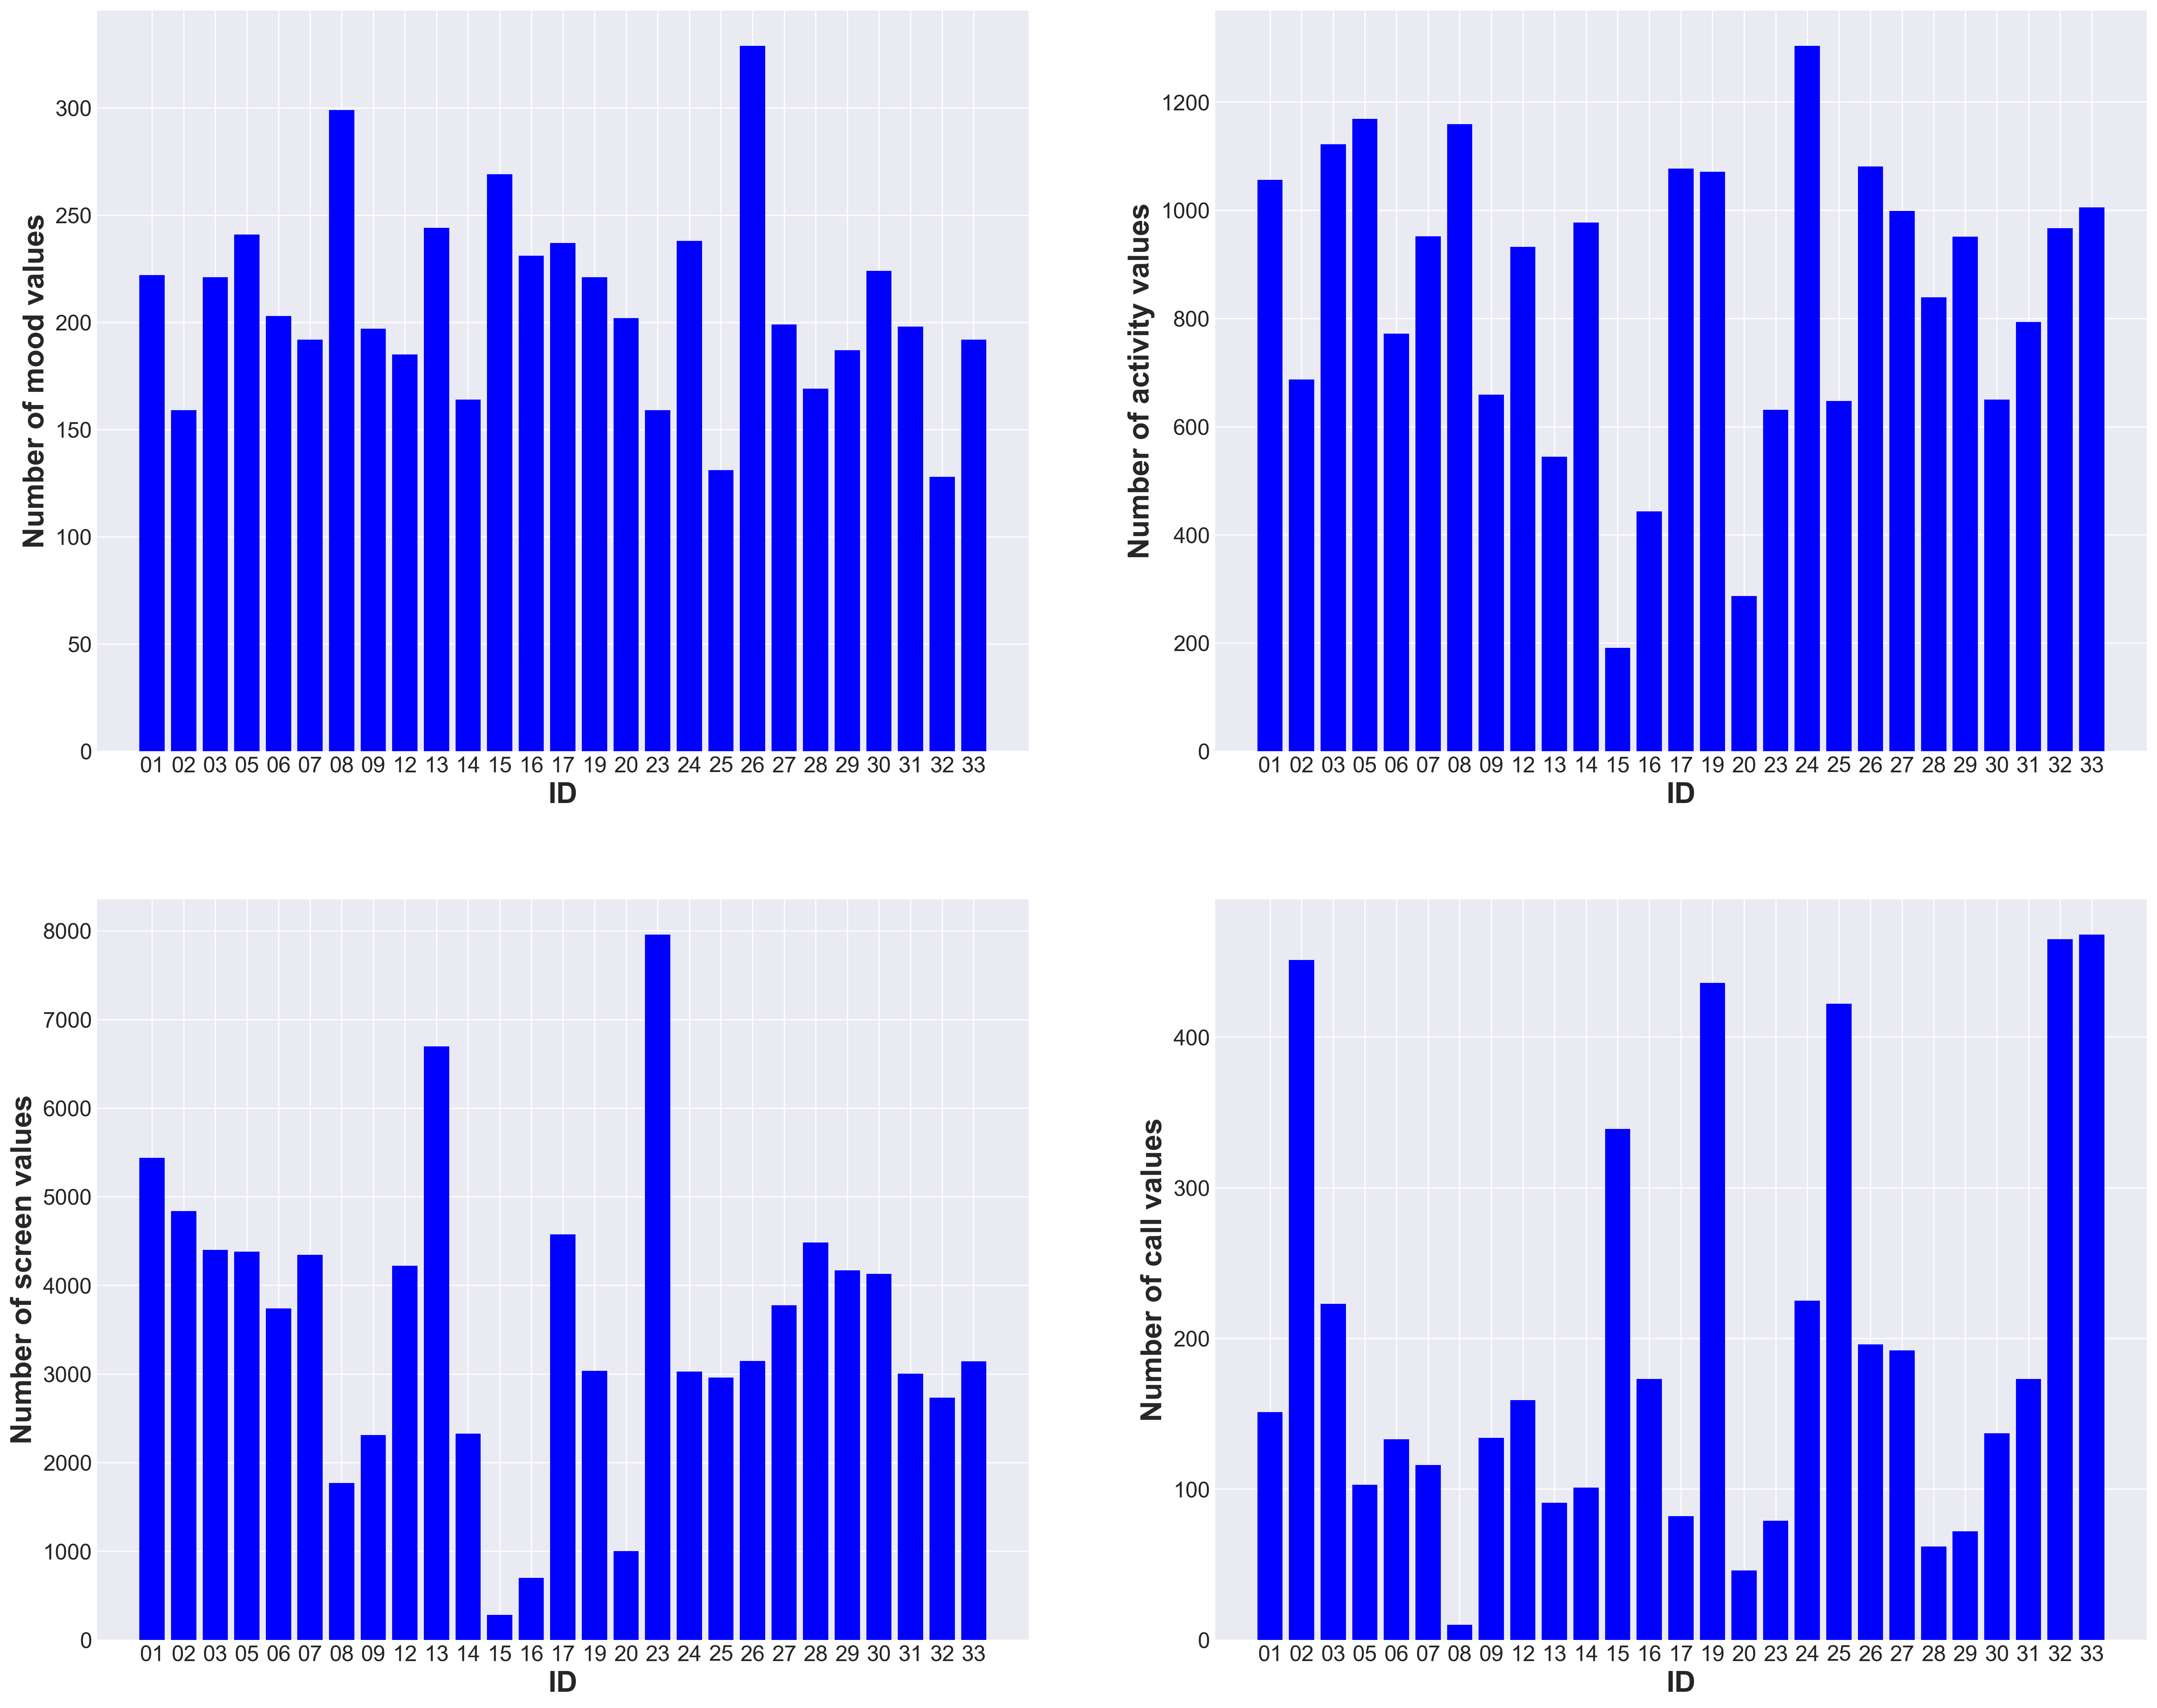

In [13]:
id_list = pivot_table.index.str.extract(r'\.(\d+)', expand=False).to_list()

top_row_attributes = ['mood','activity'] 
bottom_row_attributes = ['screen','call']

mood_list = [len(y) for y in (pivot_table['mood'].tolist())]
activity_list = [len(y) for y in (pivot_table['activity'].tolist())]
screen_list = [len(y) for y in (pivot_table['screen'].tolist())]
call_list = [len(y) for y in (pivot_table['call'].tolist())]

top_row_values = [mood_list,activity_list]
bottom_row_values = [screen_list, call_list]

fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (25,20), dpi = 300)

for idx, attribute in enumerate(top_row_values):

    axes[0,idx].bar(id_list, attribute, color="blue")
    axes[0,idx].set_xlabel('ID', fontweight = 'bold', fontsize = 20)
    axes[0,idx].set_ylabel(f'Number of {top_row_attributes[idx]} values', fontweight = 'bold', fontsize = 20)
    axes[0,idx].tick_params(axis='x', labelsize=15)
    axes[0,idx].tick_params(axis='y', labelsize=15)

for idx, attribute in enumerate(bottom_row_values):

    axes[1,idx].bar(id_list, attribute, color="blue")
    axes[1,idx].set_xlabel('ID', fontweight = 'bold', fontsize = 20)
    axes[1,idx].set_ylabel(f'Number of {bottom_row_attributes[idx]} values', fontweight = 'bold', fontsize = 20)
    axes[1,idx].tick_params(axis='x', labelsize=15)
    axes[1,idx].tick_params(axis='y', labelsize=15)



* Outlier detection

Text(0, 0.5, 'Average mood')

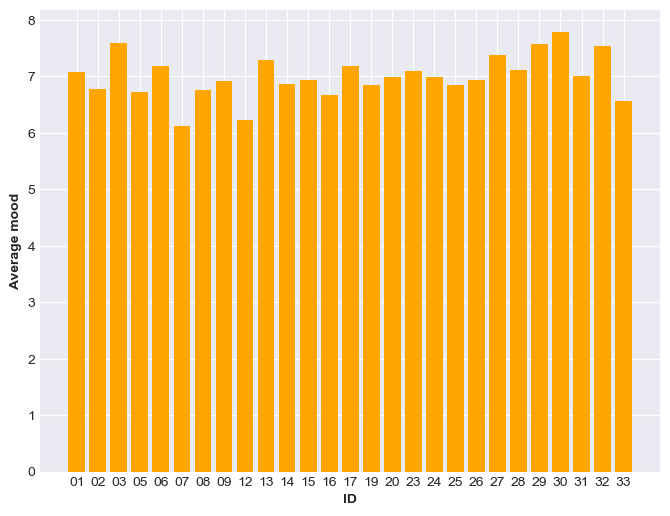

In [14]:
mean_mood_list = [np.mean(y) for y in (pivot_table['mood'].tolist())]



plt.figure(figsize=(8,6))
plt.bar(id_list,mean_mood_list, color = "orange")
plt.xlabel("ID", fontweight = 'bold')
plt.ylabel('Average mood', fontweight = 'bold')

